# Intermediate Regression with statsmodels in Python

## Parallel slopes linear regression
*Multiple regression* is a regression model with more than one explanatory variable. 

More explanatory variables can give more insight and better predictions.  

Parallel slopes is when you a numeric and categorical variables. 

To truly master linear regression, you need to be able to fit regression models with multiple explanatory variables.

The case when there is one numeric explanatory variable and one categorical explanatory variable is sometimes called a "parallel slopes" linear regression due to the shape of the predictions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Import the ols function
from statsmodels.formula.api import ols 
url= "https://raw.githubusercontent.com/cmuro27/Data_Analysis_Projects_and_Notes/main/datasets/taiwan_real_estate2.csv"
taiwan_real_estate=pd.read_csv(url,index_col=0) 
taiwan_real_estate.rename(columns={"distance to the nearest MRT station":"dist_to_mrt_m","house price of unit area":"price_twd_msq","number of convenience stores":"n_convenience"},inplace=True)
taiwan_real_estate=taiwan_real_estate.reset_index()

In [60]:
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


In [3]:
# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience",
                        data=taiwan_real_estate).fit()

# Fit a linear regression of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols("price_twd_msq ~ n_convenience + house_age_years + 0", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


For each additional nearby convenience store, the expected house price, in TWD per square meter, increases by 0.79.  
For a house aged 0 to 15 years with zero nearby convenience stores, the expected house price is 9.41 TWD per square meter.   

For linear regression with a single numeric explanatory variable, there is an intercept coefficient and a slope coefficient. For linear regression with a single categorical explanatory variable, there is an intercept coefficient for each category.

Visualizing each explanatory variable  

Being able to see the predictions made by a model makes it easier to understand. In the case where there is only one explanatory variable, seaborn lets you do this without any manual calculation.  

To visualize the relationship between a numeric explanatory variable and the numeric response, you can draw a scatter plot with a linear trend line.  

To visualize the relationship between a categorical explanatory variable and the numeric response, you can draw a box plot.  

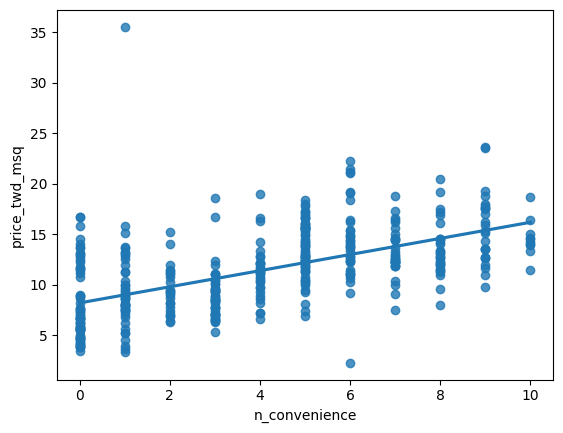

In [4]:
# Import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",y="price_twd_msq",ci=None,data=taiwan_real_estate)

# Show the plot
plt.show()

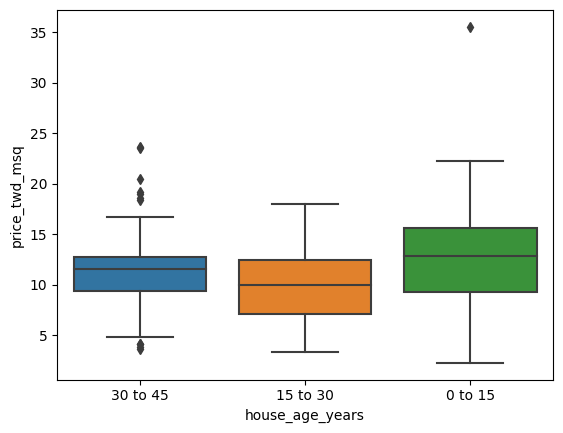

In [5]:
# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(y="price_twd_msq",x="house_age_years",data=taiwan_real_estate)

# Show the plot
plt.show()

The two plots in the previous exercise gave very different predictions: one gave a predicted response that increased linearly with a numeric variable; the other gave a fixed response for each category. The only sensible way to reconcile these two conflicting predictions is to incorporate both explanatory variables in the model at once.

When it comes to a linear regression model with a numeric and a categorical explanatory variable, seaborn doesn't have an easy, "out of the box" way to show the predictions. 

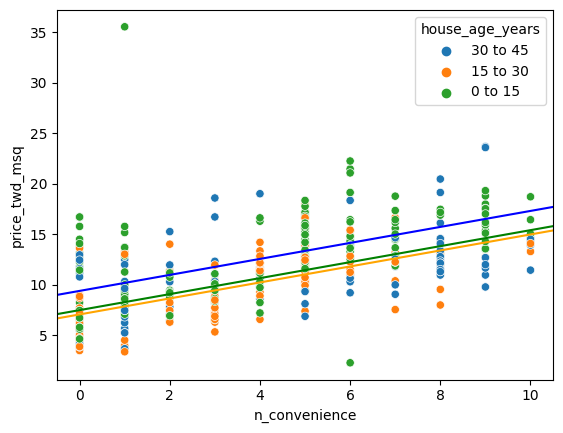

In [6]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

## Predicting parallel slopes  
Predicting responses is perhaps the most useful feature of regression models  
The prediction workflow starts with choosing values for explanatory variables. You pick any values you want, and store them in a pandas DataFrame.  

For multiple explanatory variables, you need to define multiple columns in your explanatory dataframe. The product function then creates a combination of all elements of these input lists. For e.g.  

from itertools import product  
product(["A","B","C"],[1,2])  

It is also useful the numpy function select  
np.select(conditions, choices)  
where conditions and choices are two lists.  

While seaborn can automatically show you model predictions using sns.regplot(), in order to get those values to program with, you'll need to do the calculations yourself.

Just as with the case of a single explanatory variable, the workflow has two steps: create a DataFrame of explanatory variables, then add a column of predictions.

In [7]:
import numpy as np
from itertools import product
# Create n_convenience as a range of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p,columns=["n_convenience","house_age_years"])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_both.predict(explanatory_data))

print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45       7.510958
1               0        15 to 30       7.085169
2               0         0 to 15       9.413325
3               1        30 to 45       8.302415
4               1        15 to 30       7.876627
5               1         0 to 15      10.204782
6               2        30 to 45       9.093873
7               2        15 to 30       8.668084
8               2         0 to 15      10.996239
9               3        30 to 45       9.885330
10              3        15 to 30       9.459541
11              3         0 to 15      11.787696
12              4        30 to 45      10.676787
13              4        15 to 30      10.250998
14              4         0 to 15      12.579153
15              5        30 to 45      11.468244
16              5        15 to 30      11.042455
17              5         0 to 15      13.370610
18              6        30 to 45      12.259701
19              6   

Visualizing parallel slopes model predictions

To make sure you've got the right predictions from the previous exercise, you can add them to a seaborn plot. To visualize multiple regression predictions, you use the same procedure as with linear regression: draw a scatter plot with a trend line and add a second layer of prediction points on the same plot. As you've seen in a previous exercise, seaborn can't plot the parallel slopes model directly. Therefore, you'll first re-extract the model coefficients before you plot the prediction points.

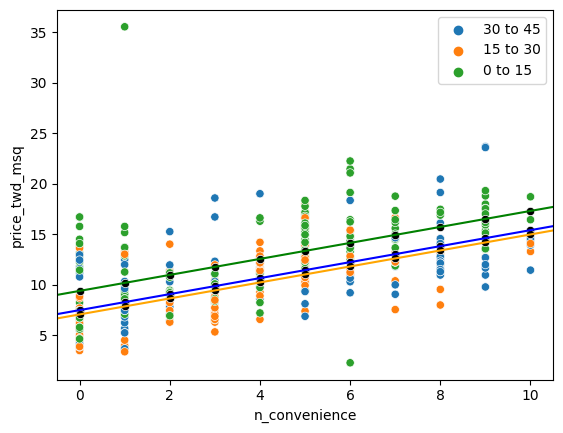

In [8]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(y="price_twd_msq",x="n_convenience",color="black",data=prediction_data)

plt.show()

Manually calculating predictions  

As with simple linear regression, you can also manually calculate the predictions from the model coefficients. The only change for the parallel slopes case is that the intercept is different for each category of the categorical explanatory variable. That means you need to consider the case when each category occurs separately.  

taiwan_real_estate, mdl_price_vs_both, and explanatory_data are available; ic_0_15, ic_15_30, ic_30_45, and slope from the previous exercise are also loaded.

In [9]:
# Define a list, conditions, with three conditional statements: house_age_years is "0 to 15", house_age_years is "15 to 30", and house_age_years is "30 to 45".
conditions = [explanatory_data["house_age_years"]=="0 to 15",explanatory_data["house_age_years"]=="15 to 30",explanatory_data["house_age_years"]=="30 to 45"]

# Define a list, choices, with the extracted intercepts from mdl_price_vs_both. These correspond to each of the conditions.
choices = [ic_0_15,ic_15_30,ic_30_45]

# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
			      intercept= intercept,
  			      price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

print(prediction_data)

    n_convenience house_age_years  intercept  price_twd_msq
0               0        30 to 45   7.510958       7.510958
1               0        15 to 30   7.085169       7.085169
2               0         0 to 15   9.413325       9.413325
3               1        30 to 45   7.510958       8.302415
4               1        15 to 30   7.085169       7.876627
5               1         0 to 15   9.413325      10.204782
6               2        30 to 45   7.510958       9.093873
7               2        15 to 30   7.085169       8.668084
8               2         0 to 15   9.413325      10.996239
9               3        30 to 45   7.510958       9.885330
10              3        15 to 30   7.085169       9.459541
11              3         0 to 15   9.413325      11.787696
12              4        30 to 45   7.510958      10.676787
13              4        15 to 30   7.085169      10.250998
14              4         0 to 15   9.413325      12.579153
15              5        30 to 45   7.51

## Assesing model performance  
The big benefit of using more than one explanatory variable in a model is that you can sometimes get a better fit than when you use a single explanatory variable.  

We know tow metrics for measuring model performance  
* *Coefficient of determination (R-squared)*: how well the linear regression line fits the observed values. Larger number is better. We use the rsquared attribute.  

* *Residual standard error (RSE)* is the hypical size of the residuals. Smaller is better. We use the mse_resid attribute.  


To easily get the coefficient determination we can use the .rsquared attribute of the fitted model.  

Adding more explanatory variables often increases the coeffcient of determination for a model, but there is a problem. Incluiding too many variables in the model can lead to a phenomenon called *overfitting*. That is when your model provide the best fit for that particular dataset, but no longer reflects the general population.  

* *Adjust coeffcient of determination* penalizes more explanatory variables. It is a better metric than the plain coefficient of determination.  
$$  \hat{R}^{2}=1-(1-R^{2})\frac{n_{obs}-1}{n_{obs}-n_{var}-1} $$  
In statsmodels, it is contained in the rsquared_adj attribute.  

In [10]:
# Print the coeffs of determination for mdl_price_vs_conv
print("rsquared_conv: ",mdl_price_vs_conv.rsquared)
print("rsquared_adj_conv: ", mdl_price_vs_conv.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_age
print("rsquared_age: ", mdl_price_vs_age.rsquared)
print("rsquared_adj_age: ", mdl_price_vs_age.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_both
print("rsquared_both: ", mdl_price_vs_both.rsquared)
print("rsquared_adj_both: ", mdl_price_vs_both.rsquared_adj)

rsquared_conv:  0.32604660851305034
rsquared_adj_conv:  0.32441079931041206
rsquared_age:  0.08382749316665172
rsquared_adj_age:  0.07936923279276686
rsquared_both:  0.39517387968887385
rsquared_adj_both:  0.3907483227109876


In [11]:
# Print the RSE for mdl_price_vs_conv
print("rse_conv: ", np.sqrt(mdl_price_vs_conv.mse_resid))

# Print the RSE for mdl_price_vs_age
print("rse_age: ", np.sqrt(mdl_price_vs_age.mse_resid))

# Print RSE for mdl_price_vs_both
print("rse_both: ", np.sqrt(mdl_price_vs_both.mse_resid))

rse_conv:  3.383887521343047
rse_age:  3.950183875630859
rse_both:  3.2134602805523227


## Models for each category  
One way to give each category a different slope is to run a separate model for each of these. 

The residual standard error for the whole dataset model, one hundred and three. For the individual models, this time the pike residual standard error is higher, indicating larger differences between actual and predicted values, but the other models show an improvement over the whole dataset model. This mixed performance result is quite common: the whole dataset model benefits from the increased power of more rows of data, whereas individual models benefit from not having to satisfy different components of data. 

 It's worth taking a look at what happens when you run a linear model on different parts of the dataset separately, to see if each model agrees or disagrees with the others.

In [12]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate["house_age_years"]=="0 to 15"]

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate["house_age_years"]=="15 to 30"]

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate["house_age_years"]=="30 to 45"]

In [13]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "0 to 15"]

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "15 to 30"]

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "30 to 45"]

# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 = ols("price_twd_msq ~ n_convenience",data=taiwan_0_to_15).fit()

# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 = ols("price_twd_msq ~ n_convenience", data=taiwan_15_to_30).fit()

# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 = ols("price_twd_msq ~ n_convenience",data=taiwan_30_to_45).fit()

# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

Intercept        9.241702
n_convenience    0.833587
dtype: float64
Intercept        6.871919
n_convenience    0.851917
dtype: float64
Intercept        8.113123
n_convenience    0.668698
dtype: float64


Predicting multiple models

In order to see what each category's model is doing, it's helpful to make predictions from them. The flow is exactly the same as the flow for making predictions on the whole model, though remember that you only have a single explanatory variable in these models.

The models mdl_0_to_15, mdl_15_to_30 and mdl_30_to_45 are available.

In [14]:
# Create explanatory_data, setting no. of conv stores from  0 to 10
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Add a column of predictions named price_twd_msq to explanatory_data, using mdl_0_to_15 and explanatory_data. Assign to prediction_data_0_to_15.
prediction_data_0_to_15 = explanatory_data.assign(price_twd_msq=mdl_0_to_15.predict(explanatory_data))

# Same again, with "15 to 30"
prediction_data_15_to_30 = explanatory_data.assign(price_twd_msq=mdl_15_to_30.predict(explanatory_data))

# Same again, with "30 to 45"
prediction_data_30_to_45 = explanatory_data.assign(price_twd_msq=mdl_30_to_45.predict(explanatory_data))

print(prediction_data_0_to_15)
print(prediction_data_15_to_30)
print(prediction_data_30_to_45)

    n_convenience  price_twd_msq
0               0       9.241702
1               1      10.075289
2               2      10.908876
3               3      11.742462
4               4      12.576049
5               5      13.409636
6               6      14.243222
7               7      15.076809
8               8      15.910396
9               9      16.743982
10             10      17.577569
    n_convenience  price_twd_msq
0               0       6.871919
1               1       7.723836
2               2       8.575753
3               3       9.427670
4               4      10.279588
5               5      11.131505
6               6      11.983422
7               7      12.835339
8               8      13.687257
9               9      14.539174
10             10      15.391091
    n_convenience  price_twd_msq
0               0       8.113123
1               1       8.781822
2               2       9.450520
3               3      10.119218
4               4      10.787916
5         

Visualizing multiple models

In the last two exercises, you ran models for each category of house ages separately, then calculated predictions for each model. Now it's time to visualize those predictions to see how they compare.

When you use sns.lmplot() with the hue argument set to the categorical variable, you get multiple trend lines, each with their own slope. This is in contrast with the parallel slopes model you saw in Chapter 1, where all models had the same slope.

taiwan_real_estate is available. prediction_data is loaded as a concatenated DataFrame of all house ages.

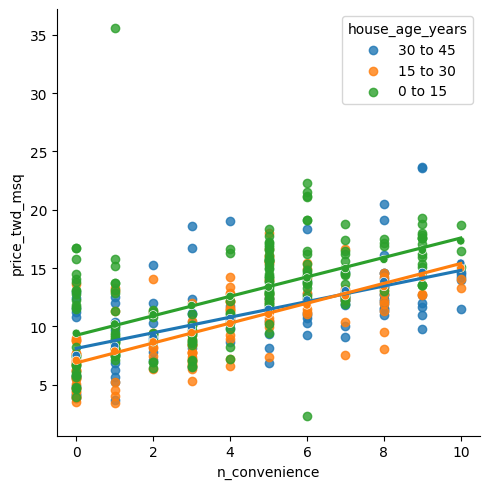

In [15]:
# Plot the trend lines of price_twd_msq vs. n_convenience for each house age category
sns.lmplot(x="n_convenience",
           y="price_twd_msq",
           data=taiwan_real_estate,
           hue="house_age_years",
           ci=None,
           legend_out=False)

# Add a scatter plot for prediction_data
sns.scatterplot(x="n_convenience",y="price_twd_msq", hue="house_age_years",data=prediction_data,
     legend=False)

plt.show()

Assessing model performance

To test which approach is best — the whole dataset model or the models for each house age category — you need to calculate some metrics. Here, you'll compare the coefficient of determination and the residual standard error for each model.

Four models of price versus no. of convenience stores (mdl_all_ages, mdl_0_to_15, mdl_15_to_30, and mdl_30_to_45) are available.

In [16]:
# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_all_ages = ols("price_twd_msq ~ n_convenience",
                        data=taiwan_real_estate).fit()


# Print the coeff. of determination for mdl_all_ages
print("R-squared for mdl_all_ages: ", mdl_all_ages.rsquared)

# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)

R-squared for mdl_all_ages:  0.32604660851305034
R-squared for mdl_0_to_15:  0.3120536339435178
R-squared for mdl_15_to_30:  0.4424604869682426
R-squared for mdl_30_to_45:  0.3125713334387281


In [17]:
# Print the coeff. of determination for mdl_all_ages
print("R-squared for mdl_all_ages: ", mdl_all_ages.rsquared)

# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)

R-squared for mdl_all_ages:  0.32604660851305034
R-squared for mdl_0_to_15:  0.3120536339435178
R-squared for mdl_15_to_30:  0.4424604869682426
R-squared for mdl_30_to_45:  0.3125713334387281


In [18]:
# Print the RSE for mdl_all_ages
print("RSE for mdl_all_ages: ", np.sqrt(mdl_all_ages.mse_resid))

# Print the RSE for mdl_0_to_15
print("RSE for mdl_0_to_15: ", np.sqrt(mdl_0_to_15.mse_resid) )

# Print the RSE for mdl_15_to_30
print("RSE for mdl_15_to_30: ", np.sqrt(mdl_15_to_30.mse_resid))

# Print the RSE for mdl_30_to_45
print("RSE for mdl_30_to_45: ", np.sqrt(mdl_30_to_45.mse_resid))

RSE for mdl_all_ages:  3.383887521343047
RSE for mdl_0_to_15:  3.564126993631971
RSE for mdl_15_to_30:  2.5852728709073385
RSE for mdl_30_to_45:  3.239037479434981


Meritable model metric measuring! It seems that both metrics for the 15 to 30 age group model are much better than those for the whole dataset model, but the models for the other two age groups are similar to the whole dataset model. Thus, using individual models will improve predictions for 15 to 30 age group.

## One model with an interaction  
Messing about with different models for different bits of your dataset is a pain. A better solution is to specify a single model that contains intercepts and slopes for each category. This is achieved through specifying interactions between explanatory variables. 

The effect of one explanatory variable on the expected response changes depending on the value of another explanatory variable.  

There are two ways to specify the interactions: implicitly or explicitly. The syntax is the following  
implicitly: response_var ~ explanatory_var1 * explanatory_var2 
explicitly: response_var ~ explanatory_var1 + explanatory_var2 + explanatory_var1:explanatory_var2 


So far you've used a single parallel slopes model, which gave an OK fit for the whole dataset, then three separate models for each house age category, which gave a better fit for each individual category, but was clunky because you had three separate models to work with and explain. Ideally, you'd have a single model that had all the predictive power of the individual models.

Defining this single model is achieved through adding interactions between explanatory variables. The syntax of statsmodels.formula is flexible, and gives you a couple of options, depending on whether you prefer concise code that is quick to type and to read, or explicit code that describes what you are doing in detail.

In [19]:
# Model price vs both with an interaction using "times" syntax
mdl_price_vs_both_inter = ols("price_twd_msq ~ n_convenience * house_age_years",
                        data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


In [20]:
# Model price vs. both with an interaction using "colon" syntax
mdl_price_vs_both_inter = ols("price_twd_msq ~ n_convenience + house_age_years + n_convenience:house_age_years",
                              data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


Interactions with understandable coeffs

The previous model with the interaction term returned coefficients that were a little tricky to interpret. In order clarify what the model is predicting, you can reformulate the model in a way that returns understandable coefficients. F

In [21]:
# Model price vs. house age plus an interaction, no intercept
mdl_readable_inter = ols("price_twd_msq ~ house_age_years + n_convenience:house_age_years + 0", data=taiwan_real_estate).fit()

# Print the coefficients for mdl_0_to_15
print("mdl_0_to_15 coefficients:", "\n", mdl_0_to_15.params)

# Print the coefficients for mdl_15_to_30
print("mdl_15_to_30 coefficients:", "\n", mdl_15_to_30.params)

# Print the coefficients for mdl_30_to_45
print("mdl_30_to_45 coefficients:", "\n", mdl_30_to_45.params)

# Print the coefficients for mdl_readable_inter
print("\n", "mdl_readable_inter coefficients:", "\n", mdl_readable_inter.params)

mdl_0_to_15 coefficients: 
 Intercept        9.241702
n_convenience    0.833587
dtype: float64
mdl_15_to_30 coefficients: 
 Intercept        6.871919
n_convenience    0.851917
dtype: float64
mdl_30_to_45 coefficients: 
 Intercept        8.113123
n_convenience    0.668698
dtype: float64

 mdl_readable_inter coefficients: 
 house_age_years[0 to 15]                   9.241702
house_age_years[15 to 30]                  6.871919
house_age_years[30 to 45]                  8.113123
n_convenience:house_age_years[0 to 15]     0.833587
n_convenience:house_age_years[15 to 30]    0.851917
n_convenience:house_age_years[30 to 45]    0.668698
dtype: float64


## Making predictions with interactions  
We follow the previous prediction flow.  


As with every other regression model you've created, the fun part is making predictions. Fortunately, the code flow for this case is the same as the one without interactions — statsmodels can handle calculating the interactions without any extra prompting from you. The only thing you need to remember is the trick for getting combinations of explanatory variables.

mdl_price_vs_both_inter is available as a fitted model, itertools.product is loaded.

In [22]:
from itertools import product
import numpy as np
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience,house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p,columns=["n_convenience","house_age_years"])

# Print it
print(explanatory_data)

    n_convenience house_age_years
0               0        30 to 45
1               0        15 to 30
2               0         0 to 15
3               1        30 to 45
4               1        15 to 30
5               1         0 to 15
6               2        30 to 45
7               2        15 to 30
8               2         0 to 15
9               3        30 to 45
10              3        15 to 30
11              3         0 to 15
12              4        30 to 45
13              4        15 to 30
14              4         0 to 15
15              5        30 to 45
16              5        15 to 30
17              5         0 to 15
18              6        30 to 45
19              6        15 to 30
20              6         0 to 15
21              7        30 to 45
22              7        15 to 30
23              7         0 to 15
24              8        30 to 45
25              8        15 to 30
26              8         0 to 15
27              9        30 to 45
28            

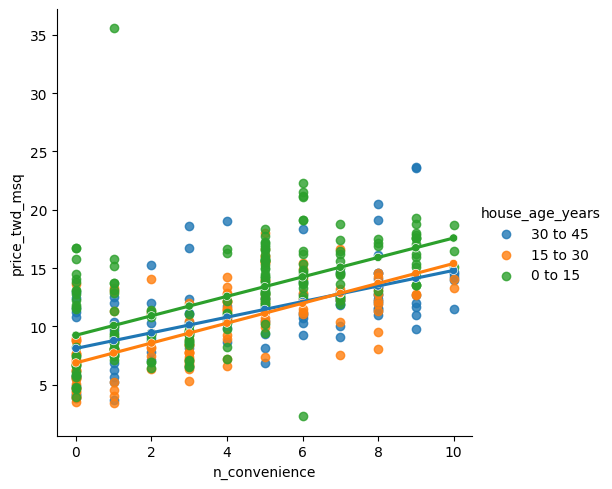

In [23]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign( 
      price_twd_msq = mdl_price_vs_both_inter.predict(explanatory_data))

# Plot the trend lines of price_twd_msq vs. n_convenience colored by house_age_years
sns.lmplot(x="n_convenience",y="price_twd_msq",ci=None,hue="house_age_years",data=taiwan_real_estate)

# Add a scatter plot for prediction_data
sns.scatterplot(x="n_convenience",y="price_twd_msq",hue="house_age_years",data=prediction_data,
     legend=False)

# Show the plot
plt.show()

Manually calculating predictions with interactions

In order to understand how .predict() works, it's time to calculate the predictions manually again. For this model, there are three separate lines to calculate for, and in each one, the prediction is an intercept plus a slope times the numeric explanatory value. The tricky part is getting the right intercept and the right slope for each case.

In [24]:
# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

# Create conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"
]

# Create intercept_choices
intercept_choices = [ic_0_15, ic_15_30, ic_30_45]

# Create slope_choices
slope_choices = [slope_0_15, slope_15_30, slope_30_45]

# Create intercept and slope
intercept = np.select(conditions,intercept_choices)
slope = np.select(conditions,slope_choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(price_twd_msq=intercept+slope*explanatory_data['n_convenience'])

# Print it
print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45      -1.128579
1               0        15 to 30      -2.369784
2               0         0 to 15       9.241702
3               1        30 to 45      -1.293467
4               1        15 to 30      -2.351453
5               1         0 to 15      10.075289
6               2        30 to 45      -1.458356
7               2        15 to 30      -2.333122
8               2         0 to 15      10.908876
9               3        30 to 45      -1.623244
10              3        15 to 30      -2.314792
11              3         0 to 15      11.742462
12              4        30 to 45      -1.788133
13              4        15 to 30      -2.296461
14              4         0 to 15      12.576049
15              5        30 to 45      -1.953021
16              5        15 to 30      -2.278131
17              5         0 to 15      13.409636
18              6        30 to 45      -2.117910
19              6   

## Simpson's paradox  
It occurs when the trend of a model on the whole dataset is very different from the trends shown by models on subsets of the dataset. 

For e.g. in the whole model the slope of the trend line can be positive, but when creating the models by groups and interactions the slopes could be negative. 
* The moral story is that it is helpful to try and visualize your dataset.  
* You cant choose the best model in general, it depends on the datset and the question you are trying to answer.  
* Articulate a question before starting fitting models. 

* Usually (but not always) the grouped model contains more insight.  
* Are you missing explanatory variables?
* Context is important.  

Modeling eBay auctions

Sometimes modeling a whole dataset suggests trends that disagree with models on separate parts of that dataset. This is known as Simpson's paradox. In the most extreme case, you may see a positive slope on the whole dataset, and negative slopes on every subset of that dataset (or the other way around).

Over the next few exercises, you'll look at eBay auctions of Palm Pilot M515 PDA models.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url="https://raw.githubusercontent.com/cmuro27/Data_Analysis_Projects_and_Notes/main/datasets/auctions.csv"
auctions=pd.read_csv(url)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         343 non-null    float64
 1   openbid       343 non-null    float64
 2   auction_type  343 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.2+ KB
None
Intercept    229.245667
openbid       -0.002098
dtype: float64


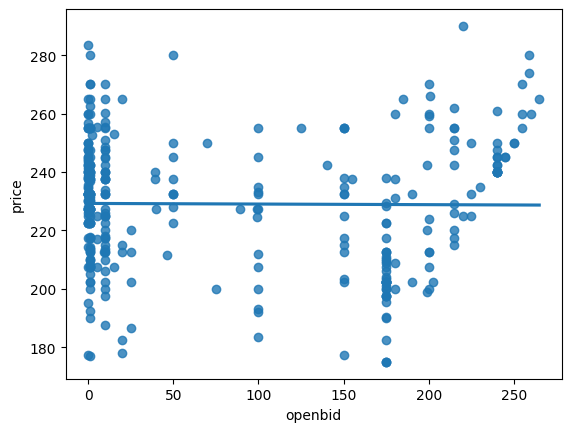

In [26]:
# Take a glimpse at the dataset
print(auctions.info())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols("price ~ openbid", data = auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

# Plot the scatter plot pf price vs. openbid with a linear trend line
sns.regplot(x="openbid",y="price",ci=None,data=auctions)

# Show the plot
plt.show()

Modeling each auction type

You just saw that the opening bid price appeared not to affect the final sale price of Palm Pilots in the eBay auctions. Now let's look at what happens when you model the three auction types (3 day, 5 day, and 7 day) separately.

In [27]:
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both = ols("price ~ auction_type + openbid:auction_type + 0",data=auctions).fit()

# See the result
print(mdl_price_vs_both.params)

auction_type[3 day auction]            226.369005
auction_type[5 day auction]            221.599320
auction_type[7 day auction]            231.602861
openbid:auction_type[3 day auction]     -0.029026
openbid:auction_type[5 day auction]      0.084014
openbid:auction_type[7 day auction]      0.003682
dtype: float64


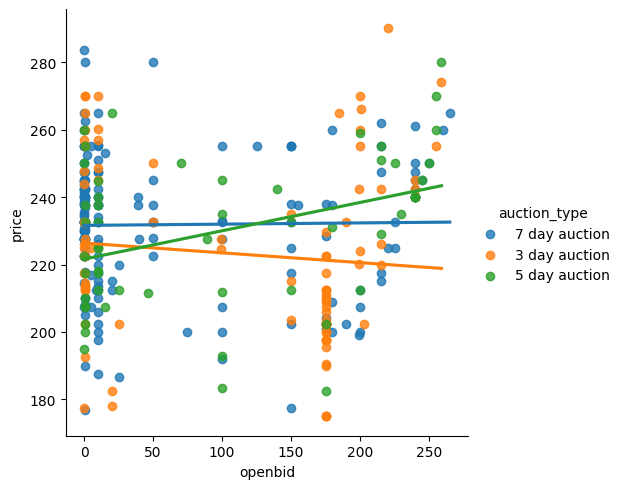

In [28]:
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both = ols("price ~ auction_type + openbid:auction_type + 0", data=auctions).fit()

# Using auctions, plot price vs. opening bid colored by auction type as a scatter plot with linear regr'n trend lines
sns.lmplot(y="price",x="openbid",hue="auction_type",ci=None,data=auctions)

# Show the plot
plt.show()


Super Simpson solving! Interpreting models is a subtle art, and your conclusions need to be based on the question you are trying to answer. Here, the answer to 'Does opening bid affect final sale price?' is no overall, but the answer to 'Does opening bid price affect final sale price for any type of auction?' is yes, for 5 day auctions.

## Two numerical explanatory variables  
To visualize three numeric variables we have two options:
* 3D scatter plot
* 2D scatter plot with response as color

Since screen are two dimensionals, 3D plots always suffer perspective issues. It is better the second option.  

Modelling with an explanatory variable is very similar as previously. The prediciton flow is not different: create a dataframe of explanaotyr values with product from itertools, then add a columns of predictions with assign and predict 

Plotting the two numeric explanatory variables on the x- and y-axis of a scatter plot, and coloring the points according to the response variable.

In [52]:
print(taiwan_real_estate.head())

               n_convenience house_age_years  price_twd_msq
dist_to_mrt_m                                              
84.87882                  10        30 to 45      11.467474
306.59470                  9        15 to 30      12.768533
561.98450                  5         0 to 15      14.311649
561.98450                  5         0 to 15      16.580938
390.56840                  5         0 to 15      13.040847


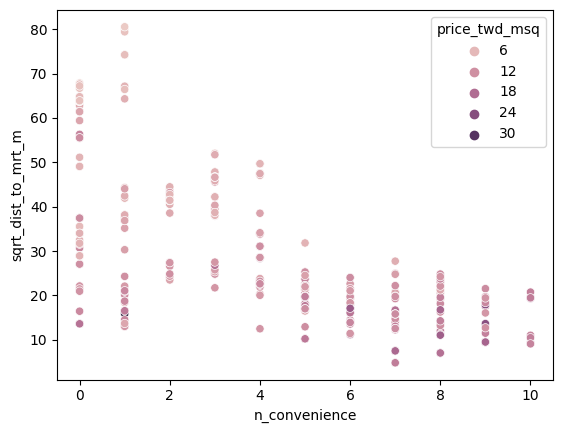

In [29]:
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x="n_convenience",y="sqrt_dist_to_mrt_m",data=taiwan_real_estate,hue="price_twd_msq")

# Show the plot
plt.show()

The code for modeling and predicting with two numeric explanatory variables is the same, other than a slight difference in how to specify the explanatory variables to make predictions against.

Here you'll model and predict the house prices against the number of nearby convenience stores and the square-root of the distance to the nearest MRT station.

In [30]:
import numpy as np
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11,1)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience,sqrt_dist_to_mrt_m)

# Transform p to a DataFrame. Name the columns "n_convenience" and "sqrt_dist_to_mrt_m"
explanatory_data = pd.DataFrame(p,columns=["n_convenience","sqrt_dist_to_mrt_m"])

# Add a column of predictions (price_twd_msq) to explanatory_data using mdl_price_vs_conv_dist and explanatory_data. Assign to prediction_data
prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_conv_dist.predict(explanatory_data))

# See the result  
print(prediction_data)


    n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0               0                   0      15.103790
1               0                  10      13.530787
2               0                  20      11.957784
3               0                  30      10.384781
4               0                  40       8.811778
..            ...                 ...            ...
94             10                  40      10.953984
95             10                  50       9.380981
96             10                  60       7.807978
97             10                  70       6.234975
98             10                  80       4.661972

[99 rows x 3 columns]


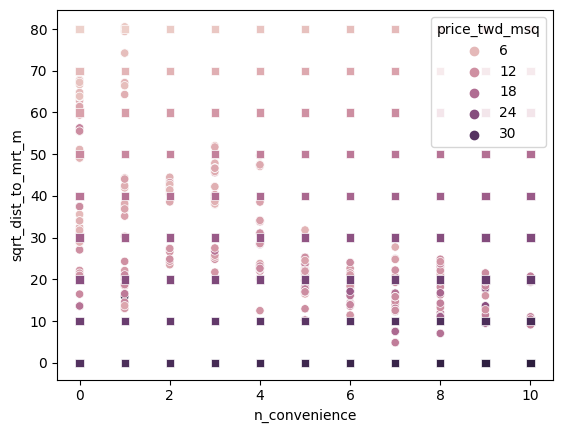

In [31]:
# Using taiwan_real_estate, create a scatter plot of sqrt_dist_to_mrt_m versus n_convenience, colored by price_twd_msq.
sns.scatterplot(x="n_convenience",y="sqrt_dist_to_mrt_m",hue="price_twd_msq",data=taiwan_real_estate)

#Create an additional scatter plot of prediction_data, without a legend, and with marker set to "s" (for squares).
sns.scatterplot(x="n_convenience",y="sqrt_dist_to_mrt_m",data=prediction_data,hue="price_twd_msq",legend=False,marker="s")

# Show the plot
plt.show()

Including an interaction

Just as in the case with one numeric and one categorical explanatory variable, it is possible for numeric explanatory variables to interact. With this model structure, you'll get a third slope coefficient: one for each explanatory variable and one for the interaction.

Here, you'll run, predict, and plot the same model as in the previous exercise, but this time including an interaction between the explanatory variables.

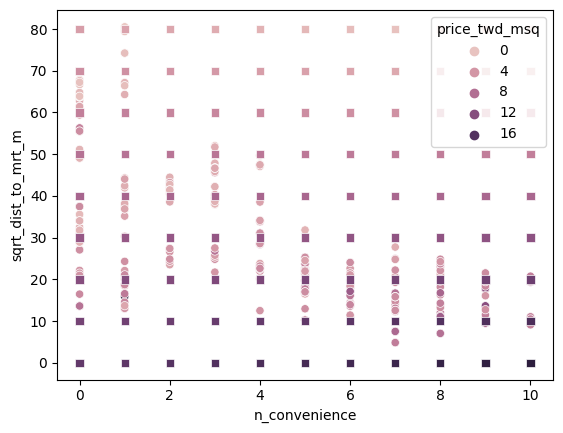

In [32]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m+n_convenience*sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

## More than two explanatory variables  
As you begin to consider more variables, plotting them all at the same time becomes increasingly difficult. In addition to using x and y scales for two numeric variables, you can use color for a third numeric variable, and you can use faceting for categorical variables. And that's about your limit before the plots become too difficult to interpret. There are some specialist plot types like correlation heatmaps and parallel coordinates plots that will handle more variables, but they give you much less information about each variable, and they aren't great for visualizing model predictions.

Here you'll push the limits of the scatter plot by showing the house price, the distance to the MRT station, the number of nearby convenience stores, and the house age, all together in one plot.

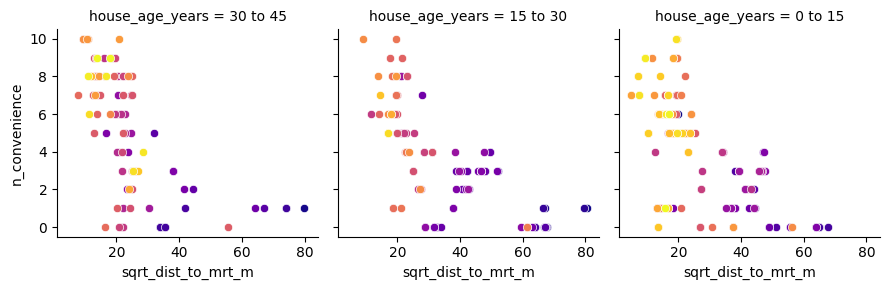

In [33]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col="house_age_years",
            hue="price_twd_msq",
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         "sqrt_dist_to_mrt_m",
         "n_convenience")

# Show the plot (brighter colors mean higher prices)
plt.show()

Different levels of interaction

Once you have three explanatory variables, the number of options for specifying interactions increases. You can specify no interactions. You can specify 2-way interactions, which gives you model coefficients for each pair of variables. The third option is to specify all the interactions, which means the three 2-way interactions and the interaction between all three explanatory variables.

As the number of explanatory variables increases further, the number of interaction possibilities rapidly increases.

In [34]:
# Fit a linear regression of house price versus n_convenience, sqrt_dist_to_mrt_m, and house_age_years. Don't include a global intercept, and don't include any interactions.
mdl_price_vs_all_no_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years",data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

Intercept                      15.474464
house_age_years[T.15 to 30]    -1.344405
house_age_years[T.30 to 45]    -1.708970
n_convenience                   0.257666
sqrt_dist_to_mrt_m             -0.148102
dtype: float64


In [35]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years",data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

Intercept                                                       16.046849
house_age_years[T.15 to 30]                                     -2.286784
house_age_years[T.30 to 45]                                     -3.958077
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]    -0.003821
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.004401
dtype: float64


In [36]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols("price_twd_msq ~ (sqrt_dist_to_mrt_m + n_convenience + house_age_years) ** 2 + 0",data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

house_age_years[0 to 15]                          16.026633
house_age_years[15 to 30]                         13.880791
house_age_years[30 to 45]                         11.926904
sqrt_dist_to_mrt_m                                -0.162025
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]     0.031600
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.068198
n_convenience                                      0.384914
n_convenience:house_age_years[T.15 to 30]         -0.006894
n_convenience:house_age_years[T.30 to 45]          0.143416
sqrt_dist_to_mrt_m:n_convenience                  -0.008956
dtype: float64


Predicting again

You've followed the prediction workflow several times now with different combinations of explanatory variables. Time to try it once more on the model with three explanatory variables. Here, you'll use the model with 3-way interactions, though the code is the same when using any of the three models from the previous exercise.

In [37]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])

# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_all_3_way_inter.predict(explanatory_data))

# See the result
print(prediction_data)

     n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0                0                   0        30 to 45      12.088773
1                0                   0        15 to 30      13.760066
2                0                   0         0 to 15      16.046849
3                0                  10        30 to 45      11.072148
4                0                  10        15 to 30      12.496811
..             ...                 ...             ...            ...
292             10                  70        15 to 30       0.900864
293             10                  70         0 to 15       2.515561
294             10                  80        30 to 45       5.179415
295             10                  80        15 to 30      -1.583811
296             10                  80         0 to 15       0.046831

[297 rows x 4 columns]


## How linear regression works  
Minimizing the sum of square residuals. 
In order to choose the "best" line to fit the data, regression models need to optimize some metric. For linear regression, this metric is called the sum of squares.  
Linear regression minimizes the sum of the squares of the differences between the actual responses and the predicted responses.

Linear regression algorithm

To truly understand linear regression, it is helpful to know how the algorithm works. The code for ols() is hundreds of lines because it has to work with any formula and any dataset. However, in the case of simple linear regression for a single dataset, you can implement a linear regression algorithm in just a few lines of code.

## Multiple logistic regression
Recall the syntax to perform logistic regression models  

from statsmodels.formula.api import logit  
logit("response ~ explanatory",data=dataset).fit()  

To extend logistic regression to multiple explanatory variables, you change the formula in the same way as linear regression, with a plus to ignore interactions,
logit("response ~ explanatory1 + explanatory2", data=dataset).fit()

or a times to include interactions
logit("response ~ explanatory * explanatory2", data=dataset).fit()  

Recall that when the response variable has two possible variables, there are four outcomes for the model  
|                  | **predicted false** | **predicted true** |
|------------------|---------------------|--------------------|
| **actual false** | correct             | false positive     |
| **actual true**  | false negative      | correct            |

The counts of each outcome are called **confusion matrix**.  

| **true negative**  | **false positive** |
|--------------------|--------------------|
| **false negative** | **true positive**  |

It can be created using  

conf_matrix=mdl_logit.pred_table()  

The confusion matrix lets you calculate metrics like model accuracy, sensitivity, and specificity.  

Logistic regression with two explanatory variables

Logistic regression also supports multiple explanatory variables. To include multiple explanatory variables in logistic regression models, the syntax is the same as for linear regressions.

Here you'll fit a model of churn status with both of the explanatory variables from the dataset: the length of customer relationship and the recency of purchase, and their interaction.

In [40]:
import pandas as pd
url_link="https://raw.githubusercontent.com/cmuro27/Data_Analysis_Projects_and_Notes/main/datasets/churn.csv"
churn=pd.read_csv(url_link)

In [41]:
# Import logit
from statsmodels.formula.api import logit 

# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit("has_churned ~ time_since_first_purchase * time_since_last_purchase",data=churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5
Intercept                                            -0.150534
time_since_first_purchase                            -0.637642
time_since_last_purchase                              0.423284
time_since_first_purchase:time_since_last_purchase    0.112250
dtype: float64


In [42]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])

# Create prediction_data
prediction_data = explanatory_data.assign(has_churned=mdl_churn_vs_both_inter.predict(explanatory_data))

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# See the result
print(prediction_data)

      time_since_first_purchase  ...  most_likely_outcome
0                          -2.0  ...                  1.0
1                          -2.0  ...                  1.0
2                          -2.0  ...                  1.0
3                          -2.0  ...                  1.0
4                          -2.0  ...                  1.0
...                         ...  ...                  ...
4326                        4.0  ...                  1.0
4327                        4.0  ...                  1.0
4328                        4.0  ...                  1.0
4329                        4.0  ...                  1.0
4330                        4.0  ...                  1.0

[4331 rows x 4 columns]


Visualizing multiple explanatory variables

Plotting has similar issues as with the linear regression case: it quickly becomes difficult to include more numeric variables in the plot. Here you'll look at the case of two numeric explanatory variables, and the solution is basically the same as before: use color to denote the response.

Here there are only two possible values of response (zero and one), both in the actual dataset and the predicted dataset

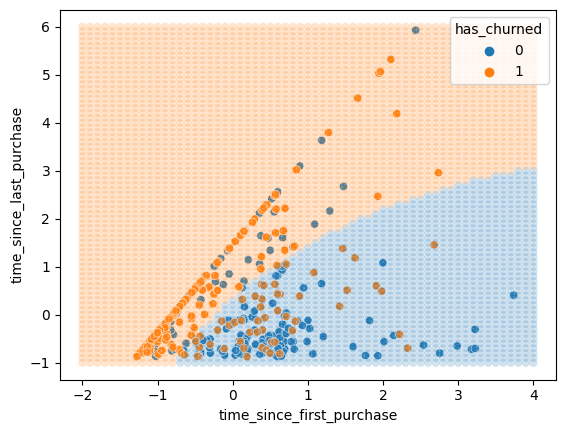

In [43]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",
     y="time_since_last_purchase", data=prediction_data,hue="most_likely_outcome",
     alpha=0.2,
     legend=False)

# Show the plot
plt.show()

Confusion matrix

When the response variable has just two outcomes, like the case of churn, the measures of success for the model are "how many cases where the customer churned did the model correctly predict?" and "how many cases where the customer didn't churn did the model correctly predict?". These can be found by generating a confusion matrix and calculating summary metrics on it.

In [44]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()
print(conf_matrix)

[[102.  98.]
 [ 53. 147.]]


In [50]:
#Extract the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) from conf_matrix.
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN+TP)/(TN+FN+FP+TP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = (TP)/(TP+FN)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity", specificity)

accuracy 0.6225
sensitivity 0.735
specificity 0.51


## The logistic distribution  
Recall that by integrating the normalized probability distribution function (pdf), we get the cumulative distribution function (cdf).  

When x is one, the CDF curve is at 0.84. That means that for a normally distributed variable x, the probability that x is less than 1 is 0.84.  

Since the CDF transforms from x-values to probabilities, you also need a way to get back from probabilities to x-values. This is the inverse CDF, also known as percent point function (PPF) or quantile function. In Python, it is calculated with norm.ppf() function.    
The cumulative distribution function for a logistic distribution is called *the logistic function*. It has the form
$$f(x)=\frac{1}{1+e^{-x}}.$$  

The inverse of the logistic function is called the *logit function*.

Cumulative distribution function

Understanding the logistic distribution is key to understanding logistic regression. Like the normal (Gaussian) distribution, it is a probability distribution of a single continuous variable. Here you'll visualize the cumulative distribution function (CDF) for the logistic distribution. That is, if you have a logistically distributed variable, x, and a possible value, xval, that x could take, then the CDF gives the probability that x is less than xval.

The logistic distribution's CDF is calculated with the logistic function (hence the name). The plot of this has an S-shape, known as a sigmoid curve. An important property of this function is that it takes an input that can be any number from minus infinity to infinity, and returns a value between zero and one.

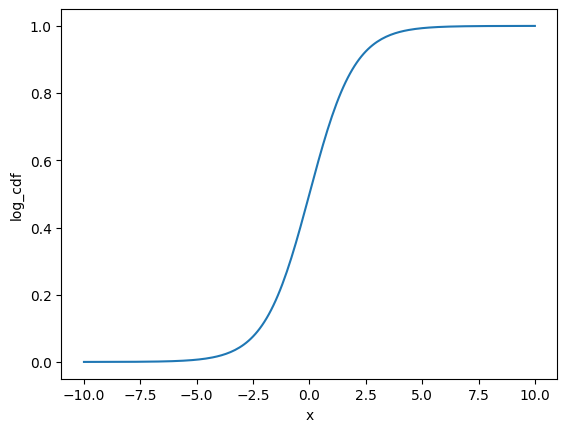

In [51]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x="x",y="log_cdf",data=logistic_dist)

# Show the plot
plt.show()

Inverse cumulative distribution function

The logistic function (logistic distribution CDF) has another important property: each x input value is transformed to a unique value. That means that the transformation can be reversed. The logit function is the name for the inverse logistic function, which is also the logistic distribution inverse cumulative distribution function. (All three terms mean exactly the same thing.)

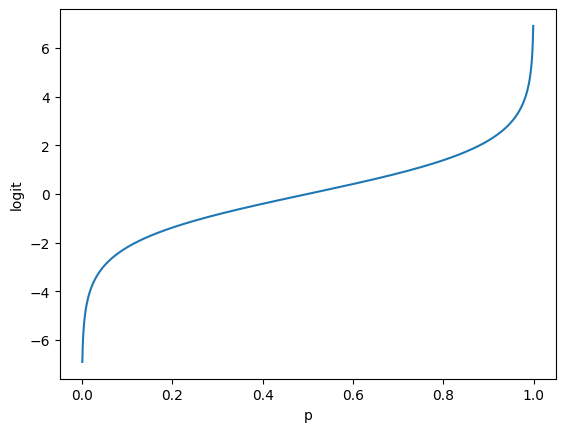

In [52]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x="p",y="logit",data=logistic_dist_inv)

# Show the plot
plt.show()

The logistic distribution consists of a whole family of curves specified by the location and scale parameters. This allows logistic model prediction curves to have different positions or steepnesses.

- ## How the logistic regression works
The principle is the same as for linear regression: choose a metric that measures how far the predicted responses are from the actual responses, and optimize that metric. 

In the case of logistic regression, the actual response is always either 0 or 1, and the predicted response is between these two values. As metric, we take the likelihood
$$\sum y_{pred}*y_{actual}+(1-y_{pred})*(1-y_{actual}),$$  
and maximize this quantity.  

Calculating the likelihood involves adding many very small numbers, leading to numerical error. It is more efficient to compute Log-likehood. The difference with the previous equation is that we take the logarithm of the predicted response $y_{pred}$.  

Maximizing log-likelihood is the same as minimizing log-likelihood  
$$-np.sum(log-likelihoods).$$  

 Logistic regression chooses the prediction line that gives you the maximum likelihood value. It also gives maximum log-likelihood